# Chromatin State for Locus

Plot chromatin state for a locus in fibroblasts and ESCs.

**Inputs**:
1. ChromHMM annotations
2. ChromHMM colors metadata
3. Bigwig files for chromatin marks

In [114]:
library(Gviz)
library(rtracklayer)

## Load Input Data

In [8]:
fibr_chromhmm = read.table("~/kundajelab/scATAC-reprog/resources/ChromHMM/E055_15_coreMarks_hg38lift_mnemonics.bed.gz")
colnames(fibr_chromhmm) = c("chr", "start", "end", "state")
fibr_chromhmm = GRanges(fibr_chromhmm)
head(fibr_chromhmm)

GRanges object with 6 ranges and 1 metadata column:
      seqnames      ranges strand |       state
         <Rle>   <IRanges>  <Rle> |    <factor>
  [1]     chr1 10000-10800      * |       9_Het
  [2]     chr1 10800-12600      * |    15_Quies
  [3]     chr1 12600-18400      * |      5_TxWk
  [4]     chr1 18400-88600      * |    15_Quies
  [5]     chr1 88600-90600      * | 14_ReprPCWk
  [6]     chr1 90600-96080      * |    15_Quies
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

In [9]:
hesc_chromhmm = read.table("~/kundajelab/scATAC-reprog/resources/ChromHMM/E003_15_coreMarks_hg38lift_mnemonics.bed.gz")
colnames(hesc_chromhmm) = c("chr", "start", "end", "state")
hesc_chromhmm = GRanges(hesc_chromhmm)
head(hesc_chromhmm)

GRanges object with 6 ranges and 1 metadata column:
      seqnames        ranges strand |    state
         <Rle>     <IRanges>  <Rle> | <factor>
  [1]     chr1   10000-10800      * |    9_Het
  [2]     chr1   10800-96080      * | 15_Quies
  [3]     chr1   96276-96476      * | 15_Quies
  [4]     chr1  97276-136400      * | 15_Quies
  [5]     chr1 136400-138800      * |   5_TxWk
  [6]     chr1 138800-139600      * |     4_Tx
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

In [23]:
rgb2hex <- function(rgb) rgb(rgb[1], rgb[2], rgb[3], maxColorValue = 255)

In [25]:
rbgstr2hex <- function(rgbstr) {rgb2hex(lapply(strsplit(rgbstr, ','), as.numeric)[[1]])}

In [82]:
# from https://egg2.wustl.edu/roadmap/web_portal/chr_state_learning.html
chromhmm_metadata = read.table("~/kundajelab/scATAC-reprog/resources/ChromHMM/metadata.tsv", 
                               sep='\t', header=T, stringsAsFactor=F)
chromhmm_metadata$COL.HEX = unlist(lapply(chromhmm_metadata$COLOR.CODE, rbgstr2hex))
rownames(chromhmm_metadata) = paste(chromhmm_metadata$STATE.NO., chromhmm_metadata$MNEMONIC, sep='_')
chromhmm_metadata

,STATE.NO.,MNEMONIC,DESCRIPTION,COLOR.NAME,COLOR.CODE,COL.HEX
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1_TssA,1,TssA,Active TSS,Red,"255,0,0",#FF0000
2_TssAFlnk,2,TssAFlnk,Flanking Active TSS,Orange Red,"255,69,0",#FF4500
3_TxFlnk,3,TxFlnk,Transcr. at gene 5 and 3,LimeGreen,"50,205,50",#32CD32
4_Tx,4,Tx,Strong transcription,Green,"0,128,0",#008000
5_TxWk,5,TxWk,Weak transcription,DarkGreen,"0,100,0",#006400
6_EnhG,6,EnhG,Genic enhancers,GreenYellow,"194,225,5",#C2E105
7_Enh,7,Enh,Enhancers,Yellow,"255,255,0",#FFFF00
8_ZNF/Rpts,8,ZNF/Rpts,ZNF genes & repeats,Medium Aquamarine,"102,205,170",#66CDAA
9_Het,9,Het,Heterochromatin,PaleTurquoise,"138,145,208",#8A91D0


In [370]:
filelist = data.frame(name=c("Fibroblast H3K27ac", "Fibroblast H3K27me3", "Fibroblast H3K4me3", "ESC H3K27ac", "ESC H3K27me3", "ESC H3K4me3"),                    
                     id=c("ENCFF592AMK", "ENCFF796ITQ", "ENCFF433CKH", "ENCFF103PND", "ENCFF131WDQ", "ENCFF889FUC"))
filelist$name = as.character(filelist$name)
filelist$id = as.character(filelist$id)
filelist$path = paste(paste("/mnt/lab_data3/surag/resources/ENCODE/", filelist$id, sep=''), ".bigWig", sep='')
filelist

name,id,path
<chr>,<chr>,<chr>
Fibroblast H3K27ac,ENCFF592AMK,/mnt/lab_data3/surag/resources/ENCODE/ENCFF592AMK.bigWig
Fibroblast H3K27me3,ENCFF796ITQ,/mnt/lab_data3/surag/resources/ENCODE/ENCFF796ITQ.bigWig
Fibroblast H3K4me3,ENCFF433CKH,/mnt/lab_data3/surag/resources/ENCODE/ENCFF433CKH.bigWig
ESC H3K27ac,ENCFF103PND,/mnt/lab_data3/surag/resources/ENCODE/ENCFF103PND.bigWig
ESC H3K27me3,ENCFF131WDQ,/mnt/lab_data3/surag/resources/ENCODE/ENCFF131WDQ.bigWig
ESC H3K4me3,ENCFF889FUC,/mnt/lab_data3/surag/resources/ENCODE/ENCFF889FUC.bigWig


In [320]:
gencode.basic.hg38 = import.gff(gzfile("../../../resources/GENCODE/gencode.v33.chr_patch_hapl_scaff.basic.annotation.gtf.gz"))
gencode.basic.hg38 = keepStandardChromosomes(gencode.basic.hg38, pruning.mode = "coarse")
gene_anno <- data.frame(gencode.basic.hg38)
gene_anno = gene_anno[!is.na(gene_anno$exon_number), ]
gene_anno = gene_anno[gene_anno$gene_type=="protein_coding", ]

# rename some columns to match requirements
gene_anno$chromosome <-  gene_anno$seqnames
gene_anno$gene <- gene_anno$gene_id
gene_anno$transcript <- gene_anno$transcript_name
gene_anno$symbol <- gene_anno$gene_name

gene_anno$feature = as.character(gene_anno$type)
gene_anno$exon = gene_anno$exon_id
gene_anno = gene_anno[,c("chromosome", "start", "end", "strand", "gene", "symbol", "transcript", "feature", "exon")]
head(gene_anno)

Warning message in readGFF(filepath, version = version, filter = filter):
"connection is not positioned at the start of the file, rewinding it"


,chromosome,start,end,strand,gene,symbol,transcript,feature,exon
,<fct>,<int>,<int>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>
57,chr1,65419,65433,+,ENSG00000186092.6,OR4F5,OR4F5-202,exon,ENSE00003812156.1
58,chr1,65520,65573,+,ENSG00000186092.6,OR4F5,OR4F5-202,exon,ENSE00003813641.1
59,chr1,65565,65573,+,ENSG00000186092.6,OR4F5,OR4F5-202,CDS,ENSE00003813641.1
60,chr1,65565,65567,+,ENSG00000186092.6,OR4F5,OR4F5-202,start_codon,ENSE00003813641.1
61,chr1,69037,71585,+,ENSG00000186092.6,OR4F5,OR4F5-202,exon,ENSE00003813949.1
62,chr1,69037,70005,+,ENSG00000186092.6,OR4F5,OR4F5-202,CDS,ENSE00003813949.1


## Functions

In [418]:
TITLE_FONTSIZE = 20

In [419]:
chromhmm_track <- function(ranges, chr, name) {
    plot_df = data.frame(chr=rep(chr, length(ranges)),
                        start = start(ranges),
                        end= end(ranges),
                        itemRgb = unlist(chromhmm_metadata[as.character(ranges$state), "COL.HEX"]))

    hmmTrack <- AnnotationTrack(GRanges(plot_df), 
                                chr=chr,
                                genome="hg38",
                                stacking="dense",
                                feature = plot_df$itemRgb, 
                                background.title = "white", 
                                fontcolor.title="black",
                                fontface.title=1,
                                rot.title=0,
                                fontsize=TITLE_FONTSIZE,
                                name = name)
    
    hmmTrack
}

In [420]:
get_histone_tracks <- function(chr, filelist, show_axis=T) {
    bw_tracks = c()
    for (i in seq(nrow(filelist))) {
        cur_bw_path = filelist[i, "path"]
        cur_bw_track = DataTrack(cur_bw_path, 
                             genome="hg38", 
                             chromosome = chr, 
                             name=sprintf("%s", filelist[i, "name"]),
                             ylim=c(0,42),
                             type="histogram",
                             rot.title=0,
                             col.histogram="black",
                             fill.histogram="black",
                             background.title = "white", 
                             fontcolor.title="black",    
                             fontface.title=1,
                             fontsize=TITLE_FONTSIZE,                                 
                                 littleTicks=F)
        
        # don't show axis ticks for each plot
        displayPars(cur_bw_track)$showAxis = F
        if (!show_axis) {
            displayPars(cur_bw_track)$showTitle = F
        }
        
        bw_tracks = c(bw_tracks, cur_bw_track)
    }
    
#     bw_tracks = bw_tracks[order(cluster_config$new_cluster)] # reorder
    
#     if (!show_axis) {
#             displayPars(bw_tracks)$showTitle = F
#             displayPars(bw_tracks)$showAxis = F
#         }
    
    bw_tracks
}

get_gene_track <- function(chr, gene_anno, show_axis=T) {
    gene_track <- GeneRegionTrack(gene_anno, genome = "hg38", 
                                 chromosome = chr, 
                                 name = "", 
                                 collapseTranscripts="longest",
                                 transcriptAnnotation="symbol",
                                background.title = 'transparent',
                                fill='#000000',
                                stackHeight=0.5,
                                 
                                col='black',
                                col.line='black',
                                fontcolor.group='black',
                                
                                lwd=2,
                                  fontsize.group=TITLE_FONTSIZE
                                 )
    if (!show_axis) {
            displayPars(gene_track)$showTitle = F
        }
    
    gene_track
}

## Plotting

In [423]:
CHR="chr16"
START=68725466
END=68841482

REG = paste(paste(CHR, START, sep=':'), END, sep='-')

In [425]:
REG

[1] "chr16:68725466-68841482"

In [426]:
cur_hesc = hesc_chromhmm[queryHits(findOverlaps(hesc_chromhmm, GRanges(REG)))]
cur_fibr = fibr_chromhmm[queryHits(findOverlaps(fibr_chromhmm, GRanges(REG)))]
cur_hesc

GRanges object with 47 ranges and 1 metadata column:
       seqnames            ranges strand |      state
          <Rle>         <IRanges>  <Rle> |   <factor>
   [1]    chr16 68715897-68731697      * |   15_Quies
   [2]    chr16 68731697-68734297      * |      7_Enh
   [3]    chr16 68734297-68736897      * |     5_TxWk
   [4]    chr16 68736897-68737097      * | 2_TssAFlnk
   [5]    chr16 68737097-68738897      * |     1_TssA
   ...      ...               ...    ... .        ...
  [43]    chr16 68801297-68803697      * |       4_Tx
  [44]    chr16 68803697-68803897      * |     6_EnhG
  [45]    chr16 68803897-68808297      * |     5_TxWk
  [46]    chr16 68808297-68836497      * |       4_Tx
  [47]    chr16 68836497-68843297      * |     5_TxWk
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

In [429]:
all_tracks = c(chromhmm_track(cur_fibr, CHR, "Fibroblast ChromHMM"),
               get_histone_tracks(CHR, filelist[1:3,], show_axis = T), 
               chromhmm_track(cur_hesc, CHR, "ESC\nChromHMM"),
               get_histone_tracks(CHR, filelist[4:6,], show_axis = T),
              get_gene_track(CHR, gene_anno, show_axis=T))

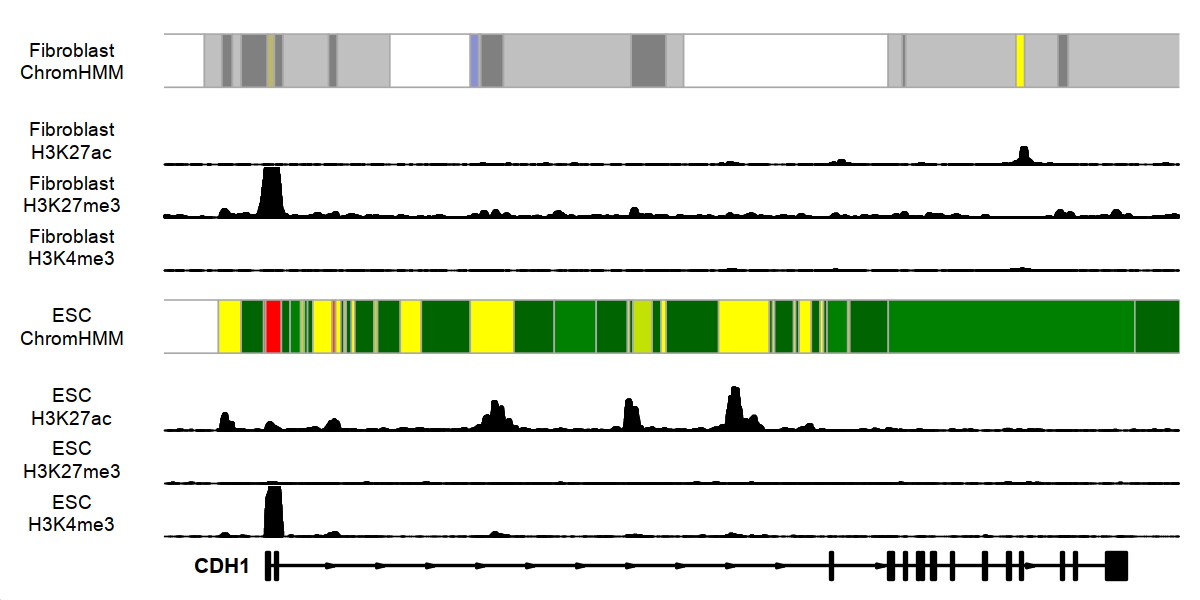

In [430]:
options(repr.plot.width = 10, repr.plot.height = 5)

plotTracks(all_tracks, 
          from=START,
          to=END, 
          sizes = c(2,1,1,1,2,1,1,1,1), #rep(1,length(all_tracks)),
           title.width=2,
           window = -1, windowSize=500,
          "#FF0000"="#FF0000","#FF4500"="#FF4500","#32CD32"="#32CD32","#008000"="#008000","#006400"="#006400","#C2E105"="#C2E105","#FFFF00"="#FFFF00","#66CDAA"="#66CDAA","#8A91D0"="#8A91D0","#CD5C5C"="#CD5C5C","#E9967A"="#E9967A","#BDB76B"="#BDB76B","#808080"="#808080","#C0C0C0"="#C0C0C0","#FFFFFF"="#FFFFFF")

In [243]:
# copy paste into plotTracks
cat(paste(paste(paste("\"", chromhmm_metadata$COL.HEX, sep=''), "\"", sep=''),
          paste(paste("\"", chromhmm_metadata$COL.HEX, sep=''), "\"", sep=''),
          sep='='), sep=',')

"#FF0000"="#FF0000","#FF4500"="#FF4500","#32CD32"="#32CD32","#008000"="#008000","#006400"="#006400","#C2E105"="#C2E105","#FFFF00"="#FFFF00","#66CDAA"="#66CDAA","#8A91D0"="#8A91D0","#CD5C5C"="#CD5C5C","#E9967A"="#E9967A","#BDB76B"="#BDB76B","#808080"="#808080","#C0C0C0"="#C0C0C0","#FFFFFF"="#FFFFFF"

---

In [257]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
[1] rtracklayer_1.46.0   Gviz_1.30.3          GenomicRanges_1.38.0
[4] GenomeInfoDb_1.22.1  IRanges_2.20.2       S4Vectors_0.24.4    
[7] BiocGenerics_0.32.0 

loaded via a namespace (and not attached):
  [1] ProtGenerics_1.18.0         bitops_1.0-6              